In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
# Seaborn color cycle
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import numpy as np
import lsst.afw.table as afwTable

import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf
from lsst.meas.deblender import utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

# Load the data

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

mcCalexp = nmf.MulticolorCalExp(filters, imgFilename, catFilename, simFilename)

INFO:lsst.meas.deblender:Loading filter g
INFO:lsst.meas.deblender:Loading filter r
INFO:lsst.meas.deblender:Loading filter i
INFO:lsst.meas.deblender:Loading filter z
INFO:lsst.meas.deblender:Loading filter y
INFO:lsst.meas.deblender:Total parents: 41
INFO:lsst.meas.deblender:Unblended sources: 25
INFO:lsst.meas.deblender:Sources with multiple peaks: 16


# Select a Parent object and initialize it
(without invoking symmetry)

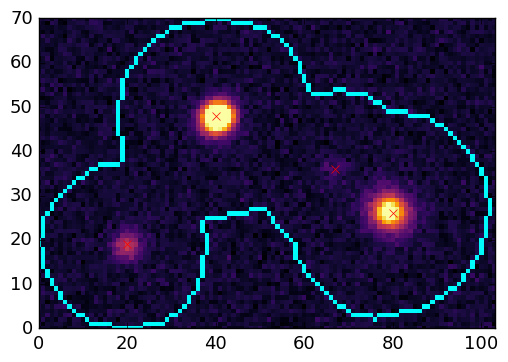

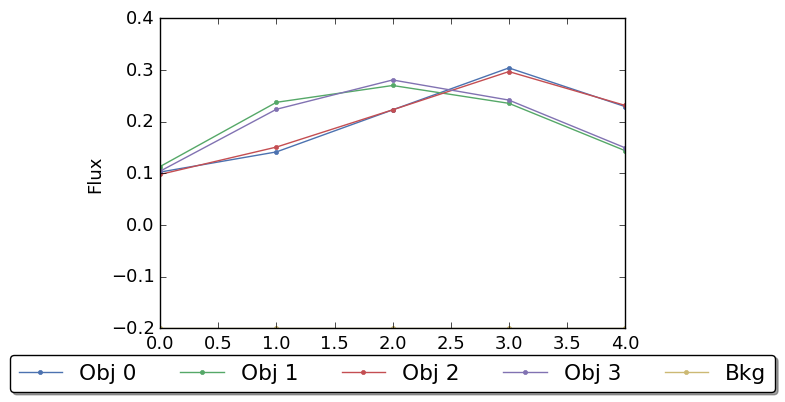

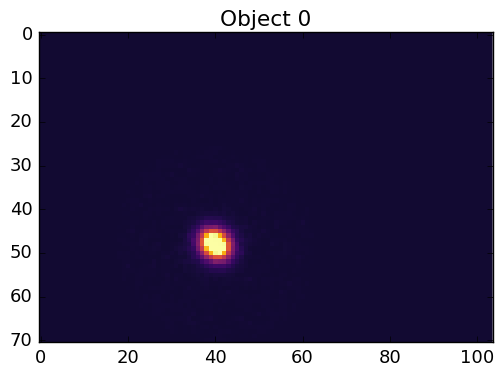

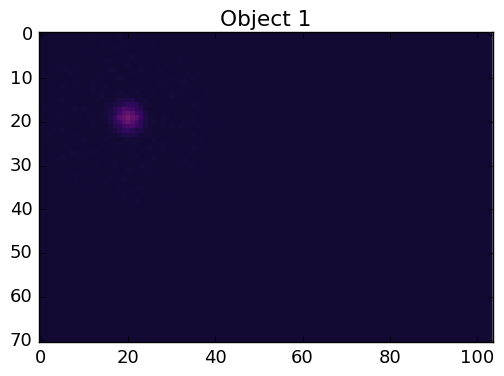

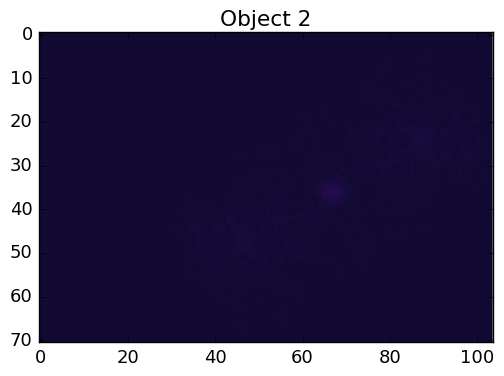

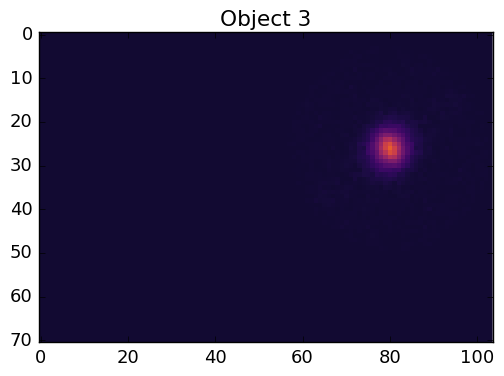

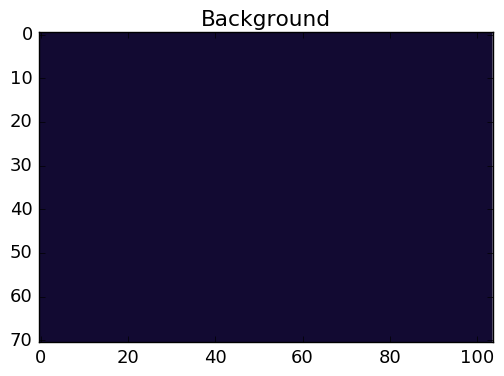

In [3]:
mcCalexp.getParentFootprint(0, mcCalexp.mergedTable["peaks"]==4, filt='r')
mcCalexp.initNMFParams(includeBkg=True, offsetData=False);

# Run the deblender with a Gradient Descent Update

INFO:lsst.meas.deblender:Filter g
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.621324098031
INFO:lsst.meas.deblender:Residual difference 8.6%
INFO:lsst.meas.deblender:Filter r
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.851319150364
INFO:lsst.meas.deblender:Residual difference 11.2%
INFO:lsst.meas.deblender:Filter i
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 1.16698834073
INFO:lsst.meas.deblender:Residual difference 8.2%
INFO:lsst.meas.deblender:Filter z
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 1.82790937898
INFO:lsst.meas.deblender:Residual difference 9.9%
INFO:lsst.meas.deblender:Filter y
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 1.26430385454
IN

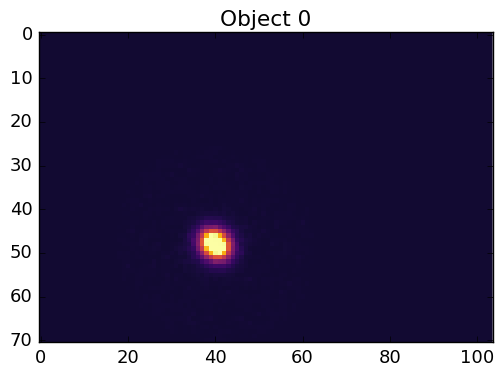

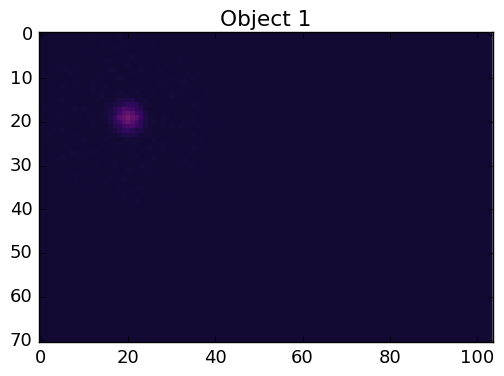

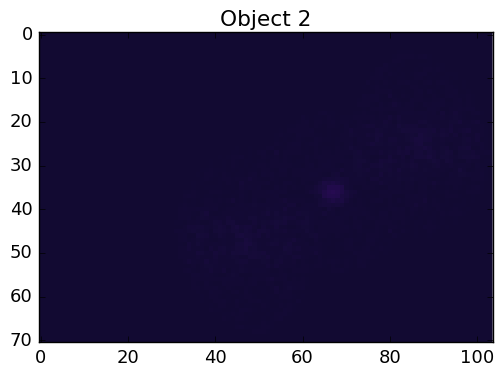

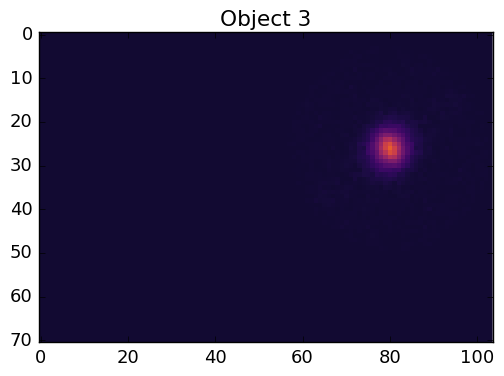

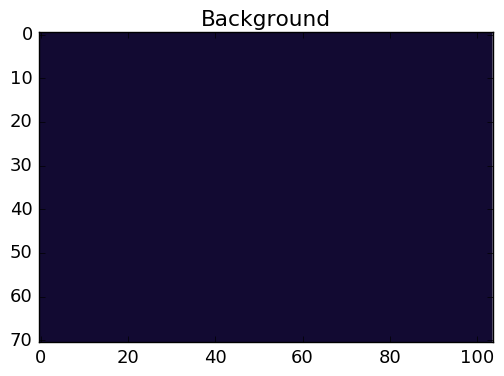

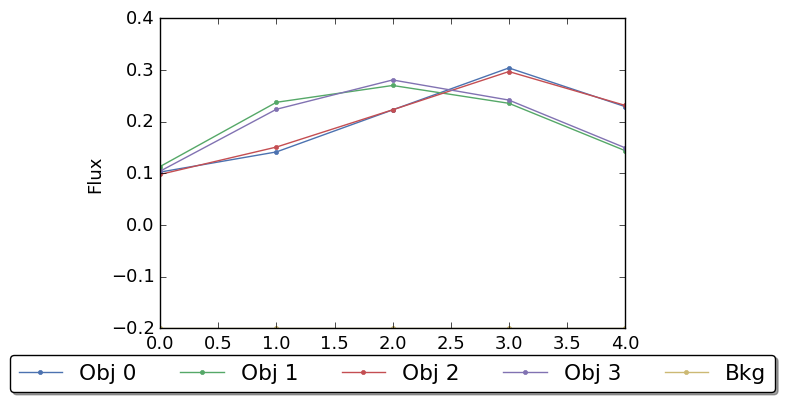

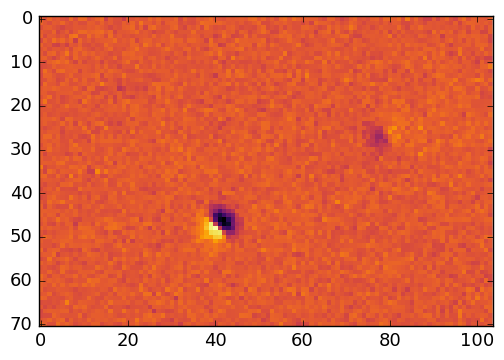

In [4]:
W,H = mcCalexp.deblend(nmfUpdateFunc=nmf.gradientDescent, steps=10, stepW=.0001, stepH=.0001)

# Now invoke symmetry

This works much better than the multiplicative case without the template cutout

INFO:lsst.meas.deblender:Filter g
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.612404330396
INFO:lsst.meas.deblender:Residual difference 9.0%
INFO:lsst.meas.deblender:Filter r
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.83511006214
INFO:lsst.meas.deblender:Residual difference 11.7%
INFO:lsst.meas.deblender:Filter i
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 1.14911286908
INFO:lsst.meas.deblender:Residual difference 8.6%
INFO:lsst.meas.deblender:Filter z
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 1.80496373412
INFO:lsst.meas.deblender:Residual difference 10.4%
INFO:lsst.meas.deblender:Filter y
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 1.2482217967
INF

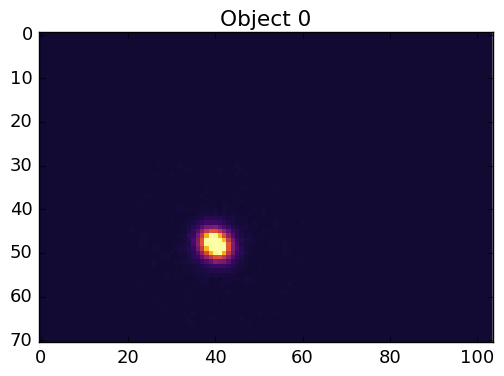

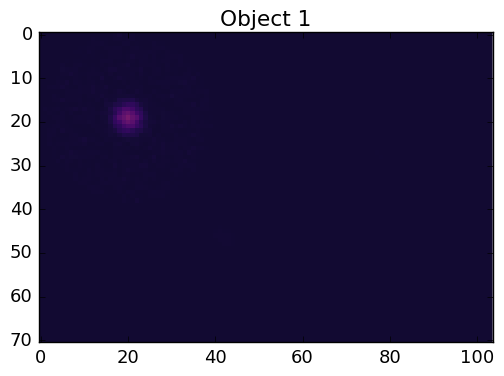

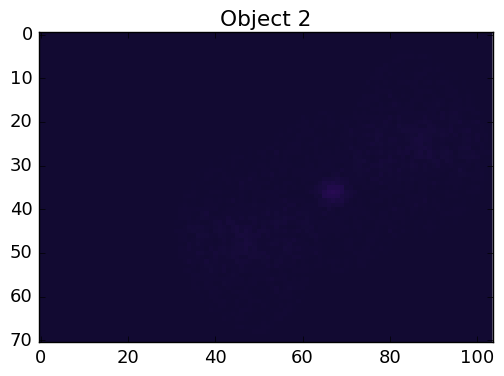

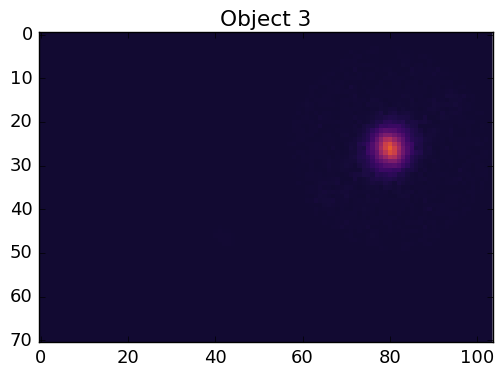

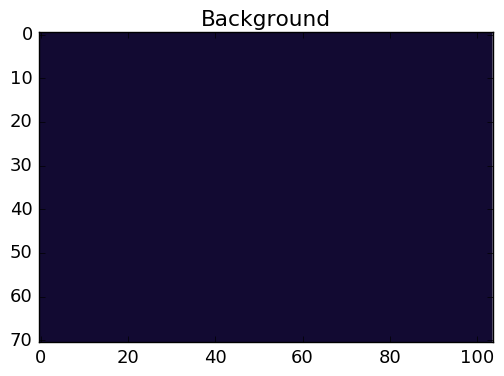

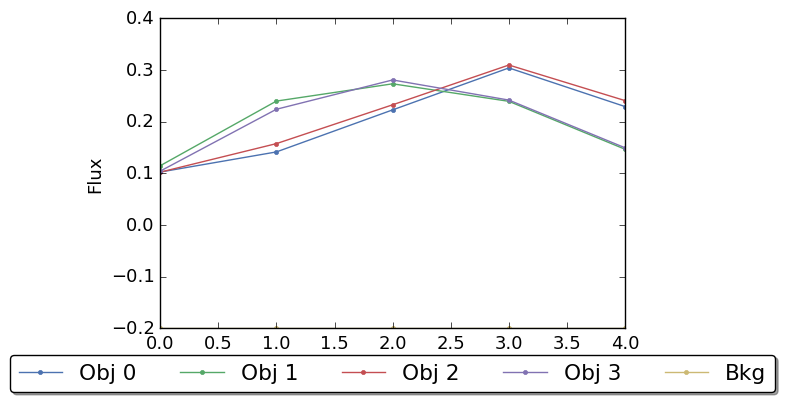

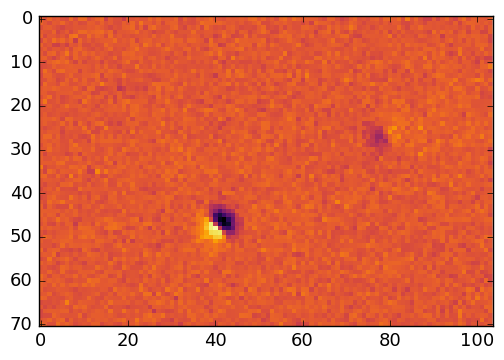

In [5]:
diffOp = mcCalexp.getSymmetryDiffOp()
W,H = mcCalexp.deblend(nmfUpdateFunc=nmf.gradientDescent, beta=1, steps=2000, stepW=.00001, stepH=.00001, diffOp=diffOp)